### Importando bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.arff import loadarff
#Mais Imports
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import ensemble, naive_bayes, svm, tree, discriminant_analysis, neighbors, feature_selection
from sklearn.model_selection import cross_validate, ShuffleSplit, GridSearchCV
#keras/deeplearning imports
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras import optimizers
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras import optimizers
from matplotlib import pyplot as plt

Using TensorFlow backend.


### Importando os dados

In [2]:
#convertendo arff files
raw_data_CM1 = loadarff('datasets/cm1.arff.txt')
raw_data_JM1 = loadarff('datasets/jm1.arff.txt')
raw_data_KC1 = loadarff('datasets/kc1.arff.txt')
raw_data_KC2 = loadarff('datasets/kc2.arff.txt')
raw_data_PC1 = loadarff('datasets/pc1.arff.txt')
#raw_data_AT = loadarff('datasets/datatrieve.arff.txt')
#raw_data_KC1_CL = loadarff('datasets/kc1-class-level-numericdefect.arff.txt')

In [3]:
#Lendo Datasets
data_CM1 = pd.DataFrame(raw_data_CM1[0])
data_JM1 = pd.DataFrame(raw_data_JM1[0])
data_KC1 = pd.DataFrame(raw_data_KC1[0])
data_KC2 = pd.DataFrame(raw_data_KC2[0])
data_PC1 = pd.DataFrame(raw_data_PC1[0])
#data_AT =  pd.DataFrame(raw_data_AT[0])
#data_KC1_CL = pd.DataFrame(raw_data_KC1_CL[0])

### Análise dos dados

In [4]:
data_KC2.rename(columns={'problems': 'defects'},inplace=True)

In [5]:
data_KC2

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,lOCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,2.0,2.0,2.0,2.0,1.2,1.2,1.2,1.2,1.4,b'no'
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,b'yes'
2,415.0,59.0,50.0,51.0,1159.0,8411.31,0.01,103.53,81.24,870848.58,...,359.0,35.0,9.0,10.0,47.0,106.0,692.0,467.0,106.0,b'yes'
3,230.0,33.0,10.0,16.0,575.0,3732.82,0.03,39.82,93.74,148644.06,...,174.0,15.0,34.0,5.0,23.0,67.0,343.0,232.0,65.0,b'yes'
4,175.0,26.0,12.0,13.0,500.0,3123.96,0.03,29.48,105.96,92103.07,...,142.0,7.0,19.0,4.0,18.0,58.0,310.0,190.0,51.0,b'yes'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,4.0,1.0,1.0,1.0,5.0,11.61,0.50,2.00,5.80,23.22,...,2.0,0.0,0.0,0.0,4.0,1.0,4.0,1.0,1.0,b'yes'
518,4.0,1.0,1.0,1.0,4.0,8.00,0.67,1.50,5.33,12.00,...,2.0,0.0,0.0,0.0,3.0,1.0,3.0,1.0,1.0,b'yes'
519,4.0,1.0,1.0,1.0,4.0,8.00,0.67,1.50,5.33,12.00,...,2.0,0.0,0.0,0.0,3.0,1.0,3.0,1.0,1.0,b'yes'
520,4.0,1.0,1.0,1.0,5.0,11.61,0.67,1.50,7.74,17.41,...,2.0,0.0,0.0,0.0,3.0,2.0,3.0,2.0,1.0,b'yes'


In [6]:
Datasets = [data_CM1, data_JM1, data_KC1, data_KC2, data_PC1] #data_AT, data_KC1_CL]

In [7]:
for x in Datasets:
    x.defects = [1 if 'true' in y.decode() else 0 for y in x.defects]

### Experimento

#### Cross - Validation Split

In [8]:
cv_split = ShuffleSplit(n_splits = 5, test_size = .3, train_size = .7, random_state = 0)

### Decision Tree

#### Hyperparâmetros de testes


In [135]:
param_grid_DT = {'criterion': ['gini','entropy'], #
              'splitter': ['best', 'random'], # metodologia para selecionar a próxima feature a ser dividida
              'max_depth': [2,4,6,8,10,None], #  altura máxima para restringir o crescimento da árvore 
             }
param_grid_LC = {"alpha": [0.0001, 0.001, 0.01],
              "penalty": ["none", "l1", "l2"]}

###### CM1

In [138]:
X_CM1 = data_CM1.drop('defects', axis=1).values
y_CM1 = data_CM1['defects'].values
#X_train, X_test, y_train, y_test = train_test_split(X_CM1, y_CM1, test_size=0.3, random_state=42)
X,y = X_CM1, y_CM1

In [150]:
NB = GaussianNB()
LC = linear_model.SGDClassifier(max_iter=1000)
DT =DecisionTreeClassifier()

In [146]:
tune_model_DT = GridSearchCV(DecisionTreeClassifier(), param_grid=param_grid_DT, scoring = 'accuracy', cv = cv_split, return_train_score=True)
tune_model_DT.fit(X, y)
tune_model_DT.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='random')

In [147]:
Final_DT = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='random')

In [151]:
tune_model_LC = GridSearchCV(LC, param_grid=param_grid_LC, scoring = 'accuracy', cv = cv_split, return_train_score=True)
tune_model_LC.fit(X, y)
tune_model_LC.best_estimator_

SGDClassifier(alpha=0.001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='none',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [155]:
Final_LC = linear_model.SGDClassifier(alpha=0.001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='none',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [157]:
cv_results_DT = cross_validate(Final_DT, X,y, cv  = cv_split, return_train_score=True)
cv_results_NB = cross_validate(NB, X,y, cv  = cv_split, return_train_score=True)
cv_results_LC = cross_validate(Final_LC, X,y, cv  = cv_split, return_train_score=True)


In [158]:
print("DT:",np.mean(cv_results_DT['test_score']))
print("NB:",np.mean(cv_results_NB['test_score']))
print("LC:",np.mean(cv_results_LC['test_score']))



DT: 0.9040000000000001
NB: 0.8493333333333333
LC: 0.8306666666666667


In [159]:
data_JM1.update(data_JM1['uniq_Op'].fillna(data_JM1['uniq_Op'].mean()))
data_JM1.update(data_JM1['uniq_Opnd'].fillna(data_JM1['uniq_Opnd'].mean()))
data_JM1.update(data_JM1['total_Op'].fillna(data_JM1['total_Op'].mean()))
data_JM1.update(data_JM1['total_Opnd'].fillna(data_JM1['branchCount'].mean()))
data_JM1.update(data_JM1['branchCount'].fillna(data_JM1['branchCount'].mean()))
X_JM1 = data_JM1.drop('defects', axis=1).values
y_JM1 = data_JM1['defects'].values
#X_train, X_test, y_train, y_test = train_test_split(X_JM1, y_JM1, test_size=0.3, random_state=42)
X,y = X_JM1, y_JM1

In [160]:
NB = GaussianNB()
lC = linear_model.SGDClassifier(max_iter=1000)
DT =DecisionTreeClassifier()

In [161]:
tune_model_DT = GridSearchCV(DecisionTreeClassifier(), param_grid=param_grid_DT, scoring = 'accuracy', cv = cv_split, return_train_score=True)
tune_model_DT.fit(X, y)
tune_model_DT.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='random')

In [162]:
Final_DT = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='random')

In [163]:
tune_model_LC = GridSearchCV(LC, param_grid=param_grid_LC, scoring = 'accuracy', cv = cv_split, return_train_score=True)
tune_model_LC.fit(X, y)
tune_model_LC.best_estimator_

SGDClassifier(alpha=0.01, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l1',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [164]:
Final_LC = linear_model.SGDClassifier(alpha=0.01, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l1',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [165]:
cv_results_DT = cross_validate(Final_DT, X,y, cv  = cv_split, return_train_score=True)
cv_results_NB = cross_validate(NB, X,y, cv  = cv_split, return_train_score=True)
cv_results_LC = cross_validate(Final_LC, X,y, cv  = cv_split, return_train_score=True)

In [166]:
print("DT:",np.mean(cv_results_DT['test_score']))
print("NB:",np.mean(cv_results_NB['test_score']))
print("LC:",np.mean(cv_results_LC['test_score']))


DT: 0.8080220453153704
NB: 0.8048989589712185
LC: 0.797917942437232


In [167]:
X_KC1 = data_KC1.drop('defects', axis=1).values
y_KC1 = data_KC1['defects'].values
#X_train, X_test, y_train, y_test = train_test_split(X_KC1, y_KC1, test_size=0.3, random_state=42)
X,y = X_KC1, y_KC1

In [168]:
NB = GaussianNB()
lC = linear_model.SGDClassifier(max_iter=1000)
DT =DecisionTreeClassifier()

In [169]:
tune_model_DT = GridSearchCV(DecisionTreeClassifier(), param_grid=param_grid_DT, scoring = 'accuracy', cv = cv_split, return_train_score=True)
tune_model_DT.fit(X, y)
tune_model_DT.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='random')

In [170]:
Final_DT = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='random')

In [171]:
tune_model_LC = GridSearchCV(LC, param_grid=param_grid_LC, scoring = 'accuracy', cv = cv_split, return_train_score=True)
tune_model_LC.fit(X, y)
tune_model_LC.best_estimator_

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l1',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [172]:
Final_LC = linear_model.SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l1',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [173]:
cv_results_DT = cross_validate(Final_DT, X,y, cv  = cv_split, return_train_score=True)
cv_results_NB = cross_validate(NB, X,y, cv  = cv_split, return_train_score=True)
cv_results_LC = cross_validate(Final_LC, X,y, cv  = cv_split, return_train_score=True)

In [174]:
print("DT:",np.mean(cv_results_DT['test_score']))
print("NB:",np.mean(cv_results_NB['test_score']))
print("LC:",np.mean(cv_results_LC['test_score']))


DT: 0.8562401263823064
NB: 0.8274881516587678
LC: 0.8069510268562402


In [108]:
data_KC2

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,lOCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,2.0,2.0,2.0,2.0,1.2,1.2,1.2,1.2,1.4,0
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0
2,415.0,59.0,50.0,51.0,1159.0,8411.31,0.01,103.53,81.24,870848.58,...,359.0,35.0,9.0,10.0,47.0,106.0,692.0,467.0,106.0,0
3,230.0,33.0,10.0,16.0,575.0,3732.82,0.03,39.82,93.74,148644.06,...,174.0,15.0,34.0,5.0,23.0,67.0,343.0,232.0,65.0,0
4,175.0,26.0,12.0,13.0,500.0,3123.96,0.03,29.48,105.96,92103.07,...,142.0,7.0,19.0,4.0,18.0,58.0,310.0,190.0,51.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,4.0,1.0,1.0,1.0,5.0,11.61,0.50,2.00,5.80,23.22,...,2.0,0.0,0.0,0.0,4.0,1.0,4.0,1.0,1.0,0
518,4.0,1.0,1.0,1.0,4.0,8.00,0.67,1.50,5.33,12.00,...,2.0,0.0,0.0,0.0,3.0,1.0,3.0,1.0,1.0,0
519,4.0,1.0,1.0,1.0,4.0,8.00,0.67,1.50,5.33,12.00,...,2.0,0.0,0.0,0.0,3.0,1.0,3.0,1.0,1.0,0
520,4.0,1.0,1.0,1.0,5.0,11.61,0.67,1.50,7.74,17.41,...,2.0,0.0,0.0,0.0,3.0,2.0,3.0,2.0,1.0,0


In [125]:
data_KC2 = pd.DataFrame(raw_data_KC2[0])

In [126]:
data_KC2.problems = [1 if 'yes' in y.decode() else 0 for y in data_KC2.problems]
data_KC2.rename(columns={'problems': 'defects'},inplace=True)

In [175]:
X_KC2 = data_KC2.drop('defects', axis=1).values
y_KC2 = data_KC2['defects'].values
#X_train, X_test, y_train, y_test = train_test_split(X_KC2, y_KC2, test_size=0.3, random_state=42)
X,y = X_KC2, y_KC2

In [176]:
NB = GaussianNB()
lC = linear_model.SGDClassifier(max_iter=1000)
DT =DecisionTreeClassifier()


In [177]:
tune_model_DT = GridSearchCV(DecisionTreeClassifier(), param_grid=param_grid_DT, scoring = 'accuracy', cv = cv_split, return_train_score=True)
tune_model_DT.fit(X, y)
tune_model_DT.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [178]:
Final_DT = DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [179]:
tune_model_LC = GridSearchCV(LC, param_grid=param_grid_LC, scoring = 'accuracy', cv = cv_split, return_train_score=True)
tune_model_LC.fit(X, y)
tune_model_LC.best_estimator_


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


SGDClassifier(alpha=0.01, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l1',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [180]:
Final_LC = linear_model.SGDClassifier(alpha=0.01, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l1',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [181]:
cv_results_DT = cross_validate(Final_DT, X,y, cv  = cv_split, return_train_score=True)
cv_results_NB = cross_validate(NB, X,y, cv  = cv_split, return_train_score=True)
cv_results_LC = cross_validate(Final_LC, X,y, cv  = cv_split, return_train_score=True)


In [182]:
print("DT:",np.mean(cv_results_DT['test_score']))
print("NB:",np.mean(cv_results_NB['test_score']))
print("LC:",np.mean(cv_results_LC['test_score']))

DT: 0.8560509554140129
NB: 0.8509554140127389
LC: 0.8369426751592357


In [183]:
X_PC1 = data_PC1.drop('defects', axis=1).values
y_PC1 = data_PC1['defects'].values
#X_train, X_test, y_train, y_test = train_test_split(X_PC1, y_PC1, test_size=0.3, random_state=42)
X,y = X_PC1, y_PC1

In [184]:
NB = GaussianNB()
lC = linear_model.SGDClassifier(max_iter=1000)
DT =DecisionTreeClassifier()

In [185]:
tune_model_DT = GridSearchCV(DecisionTreeClassifier(), param_grid=param_grid_DT, scoring = 'accuracy', cv = cv_split, return_train_score=True)
tune_model_DT.fit(X, y)
tune_model_DT.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='random')

In [186]:
Final_DT = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='random')

In [187]:
tune_model_LC = GridSearchCV(LC, param_grid=param_grid_LC, scoring = 'accuracy', cv = cv_split, return_train_score=True)
tune_model_LC.fit(X, y)
tune_model_LC.best_estimator_


SGDClassifier(alpha=0.001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l1',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [188]:
Final_LC = linear_model.SGDClassifier(alpha=0.001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l1',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [189]:
cv_results_DT = cross_validate(Final_DT, X,y, cv  = cv_split, return_train_score=True)
cv_results_NB = cross_validate(NB, X,y, cv  = cv_split, return_train_score=True)
cv_results_LC = cross_validate(Final_LC, X,y, cv  = cv_split, return_train_score=True)

In [190]:
print("DT:",np.mean(cv_results_DT['test_score']))
print("NB:",np.mean(cv_results_NB['test_score']))
print("LC:",np.mean(cv_results_LC['test_score']))


DT: 0.9303303303303304
NB: 0.9009009009009009
LC: 0.6318318318318318


### Deep Learning Model

In [44]:
X_CM1 = data_CM1.drop('defects', axis=1).values
y_CM1 = data_CM1['defects'].values
#X_train, X_test, y_train, y_test = train_test_split(X_CM1, y_CM1, test_size=0.3, random_state=42)
X,y = X_CM1, y_CM1

In [45]:
nColunas = X.shape[1]
input_shape = (nColunas,)
input_shape

(21,)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [47]:
y_train.shape

(348,)

In [48]:
#y = y.reshape(1, -1)
#y_train = y_train.reshape(1, -1)
#y_test = y_test.reshape(1, -1)

In [49]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [50]:
y_train.shape

(348, 2)

In [51]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=input_shape))
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.compile(optimizer = optimizers.SGD(lr=0.01), loss = 'categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train,y_train,epochs=20,batch_size=32,validation_data=(X_test, y_test))


Train on 348 samples, validate on 150 samples
Epoch 1/20
348/348 [==============================] - 0s 304us/step - loss: 639544873614549330694242304.0000 - accuracy: 0.6034 - val_loss: 310133923547304662353282217279488.0000 - val_accuracy: 0.8933
Epoch 2/20
348/348 [==============================] - 0s 63us/step - loss: nan - accuracy: 0.8362 - val_loss: nan - val_accuracy: 0.8933
Epoch 3/20
348/348 [==============================] - 0s 77us/step - loss: nan - accuracy: 0.9052 - val_loss: nan - val_accuracy: 0.8933
Epoch 4/20
348/348 [==============================] - 0s 66us/step - loss: nan - accuracy: 0.9052 - val_loss: nan - val_accuracy: 0.8933
Epoch 5/20
348/348 [==============================] - 0s 75us/step - loss: nan - accuracy: 0.9052 - val_loss: nan - val_accuracy: 0.8933
Epoch 6/20
348/348 [==============================] - 0s 77us/step - loss: nan - accuracy: 0.9052 - val_loss: nan - val_accuracy: 0.8933
Epoch 7/20
348/348 [==============================] - 0s 83us/step 

In [52]:
def get_new_model(ativacao,n_layers,input_shape):
    model = Sequential()
    model.add(Dense(64, activation=ativacao, input_shape=input_shape))
    for x in range(n_layers):
        model.add(Dense(64, activation=ativacao))
    model.add(Dense(2, activation='softmax'))
    return(model)
lr_to_test = [0.001, 0.01, 0.1]
n_layers = [1,2,3]
# loop over learning rates
for lr in lr_to_test:
    otimizadores= [optimizers.SGD(lr=lr),optimizers.Adam(lr=lr)]
    for op in otimizadores:
        for x in n_layers:
            print("Camadas Escondidas =",x)
            print("LR =",lr)
            print("OPTIMIZERS :",op)
            print("MODELO COM TANH :")
            model = get_new_model('tanh',x,input_shape)
            model.compile(optimizer = op, loss = 'categorical_crossentropy', metrics=['accuracy']) 
            history = model.fit(X_train,y_train,epochs=20,batch_size=32,verbose=0,validation_data=(X_test, y_test))
            print("MODELO COM RELU :")
            model = get_new_model('relu',x,input_shape)
            model.compile(optimizer = op, loss = 'categorical_crossentropy', metrics=['accuracy']) 
            history = model.fit(X_train,y_train,epochs=20,batch_size=32,verbose=0,validation_data=(X_test, y_test))

Camadas Escondidas = 1
LR = 0.001
OPTIMIZERS : <keras.optimizers.SGD object at 0x0000020FE1086C08>
MODELO COM TANH :
MODELO COM RELU :
Camadas Escondidas = 2
LR = 0.001
OPTIMIZERS : <keras.optimizers.SGD object at 0x0000020FE1086C08>
MODELO COM TANH :
MODELO COM RELU :
Camadas Escondidas = 3
LR = 0.001
OPTIMIZERS : <keras.optimizers.SGD object at 0x0000020FE1086C08>
MODELO COM TANH :
MODELO COM RELU :
Camadas Escondidas = 1
LR = 0.001
OPTIMIZERS : <keras.optimizers.Adam object at 0x0000020FE10611C8>
MODELO COM TANH :
MODELO COM RELU :
Camadas Escondidas = 2
LR = 0.001
OPTIMIZERS : <keras.optimizers.Adam object at 0x0000020FE10611C8>
MODELO COM TANH :
MODELO COM RELU :
Camadas Escondidas = 3
LR = 0.001
OPTIMIZERS : <keras.optimizers.Adam object at 0x0000020FE10611C8>
MODELO COM TANH :
MODELO COM RELU :
Camadas Escondidas = 1
LR = 0.01
OPTIMIZERS : <keras.optimizers.SGD object at 0x0000020FDE77D388>
MODELO COM TANH :
MODELO COM RELU :
Camadas Escondidas = 2
LR = 0.01
OPTIMIZERS : <keras.

In [41]:
model.evaluate(X_test,y_test)

150/150 [==============================] - 0s 33us/step


[0.359560440381368, 0.8933333158493042]

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


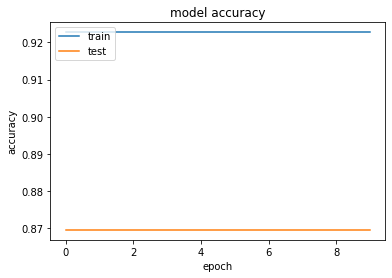

In [43]:

history = model.fit(X_train, y_train, validation_split=0.33, epochs=10, batch_size=3, verbose=0)
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [53]:
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.constraints import maxnorm

In [63]:
y_ = to_categorical(y)

In [64]:
y_.shape

(498, 2)

In [65]:
def create_model(ativacao='relu',input_shape=(21,),n_layers=2,op=1,lr=0.01):
# create model
    if(op == 0):
        model = Sequential()
        model.add(Dense(64, activation=ativacao, input_shape=input_shape))
        for x in range(n_layers):
            model.add(Dense(64, activation=ativacao))
        model.add(Dense(2, activation='softmax'))
        model.compile(optimizer = optimizers.SGD(lr=lr), loss = 'categorical_crossentropy', metrics=['accuracy'])
    else:
        model = Sequential()
        model.add(Dense(64, activation=ativacao, input_shape=input_shape))
        for x in range(n_layers):
            model.add(Dense(64, activation=ativacao))
        model.add(Dense(2, activation='softmax'))
        model.compile(optimizer = optimizers.Adam(lr=lr), loss = 'categorical_crossentropy', metrics=['accuracy'])
        
    return(model)

In [93]:
op= [0,1]
ativacao = ['relu','tanh']
lr = [0.001, 0.01, 0.1]
n_layers = [1,2,3]
seed = 7
numpy.random.seed(seed)
model = KerasClassifier(build_fn=create_model, epochs=20, batch_size=10, verbose=0)
param_grid = dict(op=op,ativacao=ativacao,lr=lr,n_layers=n_layers)
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

In [94]:
X_CM1 = data_CM1.drop('defects', axis=1).values
y_CM1 = data_CM1['defects'].values
#X_train, X_test, y_train, y_test = train_test_split(X_CM1, y_CM1, test_size=0.3, random_state=42)
X,y = X_CM1, y_CM1
y_ = to_categorical(y)

In [95]:
grid_result = grid.fit(X, y_)

KeyboardInterrupt: 

In [70]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.901606 using {'ativacao': 'relu', 'lr': 0.001, 'n_layers': 1, 'op': 0}


In [71]:
means = grid_result.cv_results_['mean_test_score']

JM1

In [76]:
data_JM1.update(data_JM1['uniq_Op'].fillna(data_JM1['uniq_Op'].mean()))
data_JM1.update(data_JM1['uniq_Opnd'].fillna(data_JM1['uniq_Opnd'].mean()))
data_JM1.update(data_JM1['total_Op'].fillna(data_JM1['total_Op'].mean()))
data_JM1.update(data_JM1['total_Opnd'].fillna(data_JM1['branchCount'].mean()))
data_JM1.update(data_JM1['branchCount'].fillna(data_JM1['branchCount'].mean()))
X_JM1 = data_JM1.drop('defects', axis=1).values
y_JM1 = data_JM1['defects'].values
#X_train, X_test, y_train, y_test = train_test_split(X_JM1, y_JM1, test_size=0.3, random_state=42)
X,y = X_JM1, y_JM1

In [77]:
y_ = to_categorical(y)

In [79]:
model = KerasClassifier(build_fn=create_model, epochs=20, batch_size=10, verbose=0)
param_grid = dict(op=op,ativacao=ativacao,lr=lr,n_layers=n_layers)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=5)
grid_result = grid.fit(X, y_)

In [80]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.806523 using {'ativacao': 'relu', 'lr': 0.001, 'n_layers': 2, 'op': 0}


In [82]:
X_KC1 = data_KC1.drop('defects', axis=1).values
y_KC1 = data_KC1['defects'].values
#X_train, X_test, y_train, y_test = train_test_split(X_KC1, y_KC1, test_size=0.3, random_state=42)
X,y = X_KC1, y_KC1
y_ = to_categorical(y)

In [83]:
model = KerasClassifier(build_fn=create_model, epochs=20, batch_size=10, verbose=0)
param_grid = dict(op=op,ativacao=ativacao,lr=lr,n_layers=n_layers)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=5)
grid_result = grid.fit(X, y_)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best: 0.845424 using {'ativacao': 'relu', 'lr': 0.01, 'n_layers': 1, 'op': 0}


In [84]:
data_KC2 = pd.DataFrame(raw_data_KC2[0])
data_KC2.problems = [1 if 'yes' in y.decode() else 0 for y in data_KC2.problems]
data_KC2.rename(columns={'problems': 'defects'},inplace=True)

In [86]:
X_KC2 = data_KC2.drop('defects', axis=1).values
y_KC2 = data_KC2['defects'].values
#X_train, X_test, y_train, y_test = train_test_split(X_KC2, y_KC2, test_size=0.3, random_state=42)
X,y = X_KC2, y_KC2

In [87]:
y_ = to_categorical(y)

In [88]:
model = KerasClassifier(build_fn=create_model, epochs=20, batch_size=10, verbose=0)
param_grid = dict(op=op,ativacao=ativacao,lr=lr,n_layers=n_layers)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=5)
grid_result = grid.fit(X, y_)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

C:\ProgramData\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best: 0.796935 using {'ativacao': 'tanh', 'lr': 0.001, 'n_layers': 3, 'op': 0}


In [89]:
X_PC1 = data_PC1.drop('defects', axis=1).values
y_PC1 = data_PC1['defects'].values
#X_train, X_test, y_train, y_test = train_test_split(X_PC1, y_PC1, test_size=0.3, random_state=42)
X,y = X_PC1, y_PC1

In [90]:
y_ = to_categorical(y)

In [91]:
model = KerasClassifier(build_fn=create_model, epochs=20, batch_size=10, verbose=0)
param_grid = dict(op=op,ativacao=ativacao,lr=lr,n_layers=n_layers)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=5)
grid_result = grid.fit(X, y_)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

C:\ProgramData\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best: 0.930568 using {'ativacao': 'relu', 'lr': 0.001, 'n_layers': 3, 'op': 0}
